# Anime Recommendation System - Model
#### Yun Xing
#### 2023.5.21

**animelist.csv** have the list of all animes register by the user with the respective score, watching status and numbers of episodes watched. This dataset contains 109 Million row, 17.562 different animes and 325.772 different users. 

**anime.csv** contain general information of every anime (17.562 different anime) like genre, stats, studio, etc. This file have the following columns:


In [145]:
import pandas as pd
import numpy as np

In [146]:
anime = pd.read_csv("dataset/anime.csv")
rating = pd.read_csv("dataset/animelist.csv")

In [147]:
rating.columns

Index(['user_id', 'anime_id', 'rating', 'watching_status', 'watched_episodes'], dtype='object')

In [148]:
anime.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [149]:
rating = rating[rating.watched_episodes!=0]

In [150]:
anime.head(3)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0


In [151]:
rating.head(3)

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4


## Collaborative Filtering 

for users who have rated more than 1000 animes,  we recommend based on Collaborative Filtering method. (predicting what users will like based on their similarity to other users.)

we use Cosine similarity here. 

In [158]:
rating_count = rating['user_id'].value_counts()

In [159]:
rating_count.sort_values()

236274        1
164398        1
164035        1
47520         1
158179        1
          ...  
283786    14398
264001    14504
162615    15023
189037    15862
131988    17145
Name: user_id, Length: 323575, dtype: int64

In [160]:
rating_df = rating[rating['user_id'].isin(rating_count[rating_count >= 1000].index)].copy()
len(rating_df)

11282376

In [161]:
# scale ratings to 0 - 1.0
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rating_df['rating']=scaler.fit_transform(rating_df['rating'].values.reshape(-1,1))

In [162]:
avg = np.mean(rating_df['rating'])
print('average rating :' , avg)

average rating : 0.5459160907249484


In [163]:
len(rating_df['user_id'].unique())

7511

In [164]:
rating_df.head()

,user_id,anime_id,rating,watching_status,watched_episodes
3988,17,34572,0.0,1,167
3989,17,2994,0.0,1,1
3990,17,40852,0.0,1,9
3991,17,41694,0.0,1,5
3992,17,40530,0.0,1,10


In [165]:
df_pivot = rating_df.pivot_table(index='user_id' ,columns='anime_id',values='rating',aggfunc=np.sum)
df_pivot = df_pivot.fillna(0)
df_pivot

anime_id,1,5,6,7,8,15,16,17,18,19,...,47777,47778,47795,48097,48177,48369,48374,48409,48413,48456
user_id,,,,,,,,,,,,,,,,,,,,,
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
326,1.0,1.0,0.8,0.8,0.0,0.8,0.8,0.0,0.9,0.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
346,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,0.7,0.7,0.7,0.0,0.0,0.7,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
478,0.0,0.0,0.0,0.5,0.0,0.8,0.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353304,0.7,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.7,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353311,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353325,0.9,0.0,0.8,0.9,0.0,1.0,0.8,0.8,0.8,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
# some data processing again

user_ids = rating_df["user_id"].unique().tolist()

user2user_encoded = {x: i for i, x in enumerate(user_ids)}

user_encoded2user = {i: x for i, x in enumerate(user_ids)}

rating_df["user"] = rating_df["user_id"].map(user2user_encoded)

n_users = len(user2user_encoded)

anime_ids = rating_df["anime_id"].unique().tolist()

anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}

anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}

rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)

n_animes = len(anime2anime_encoded)

print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))

print("Min rating: {}, Max rating: {}".format(min(rating_df['rating']), max(rating_df['rating'])))

Num of users: 7511, Num of animes: 17308
Min rating: 0.0, Max rating: 1.0


### get test, train data

In [167]:
# shuffle and split 
rating_df = rating_df.sample(frac=1, random_state=1)

X = rating_df[['user', 'anime']].values
y = rating_df["rating"]

In [168]:
rating_df.shape[0]

11282376

In [169]:
test_set_size = 10000
indices = rating_df.shape[0] - test_set_size 

X_train, X_test, y_train, y_test = (X[:indices],X[indices:],y[:indices],y[indices:],)

print('Train set ratings: {}'.format(len(y_train)))
print('Test set ratings: {}'.format(len(y_test)))

Train set ratings: 11272376
Test set ratings: 10000


In [170]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

### build models

In [171]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [172]:
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten

def RecommenderNet():
    embedding_size = 128
    
    user = Input(name = 'user', shape = [1])
    user_embedding = Embedding(name = 'user_embedding',
                       input_dim = n_users, 
                       output_dim = embedding_size)(user)
    
    anime = Input(name = 'anime', shape = [1])
    anime_embedding = Embedding(name = 'anime_embedding',
                       input_dim = n_animes, 
                       output_dim = embedding_size)(anime)
    
    x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, anime_embedding])
    x = Flatten()(x)
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)
    
    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer='Adam')
    return model


model = RecommenderNet()

model.summary()
    

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 anime (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 128)       961408      ['user[0][0]']                   
                                                                                                  
 anime_embedding (Embedding)    (None, 1, 128)       2215424     ['anime[0][0]']                  
                                                                                            

In [173]:
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, EarlyStopping

start_lr = 0.00001 
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lr_scheduler(epoch, lr):
    decay_rate = 0.1
    decay_step = 90
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

lr_callback = LearningRateScheduler(lr_scheduler,verbose=1) 

checkpoint_filepath = './weights.h5'

model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
                                   save_weights_only=True,
                                   monitor='val_loss',
                                   mode='min',
                                   save_best_only=True)

early_stopping= EarlyStopping(patience=3,monitor='val_loss',mode='min',restore_best_weights=True)


modelcallbacks = [model_checkpoint,lr_callback,early_stopping]

In [174]:
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=modelcallbacks
)

model.load_weights(checkpoint_filepath)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20
1128/1128 [==============================] - 46s 40ms/step - loss: 0.5798 - mae: 0.1753 - mse: 0.0558 - val_loss: 0.5304 - val_mae: 0.1330 - val_mse: 0.0371 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/20
1128/1128 [==============================] - 49s 43ms/step - loss: 0.5218 - mae: 0.1240 - mse: 0.0328 - val_loss: 0.5223 - val_mae: 0.1265 - val_mse: 0.0347 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/20
1128/1128 [==============================] - 47s 42ms/step - loss: 0.5118 - mae: 0.1157 - mse: 0.0293 - val_loss: 0.5227 - val_mae: 0.1288 - val_mse: 0.0353 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/20
1128/1128 [==============================] - 47s 41ms/step - loss: 0.5065 - mae: 0.1115 - mse: 0.0274 - val_loss: 0.5218 - val

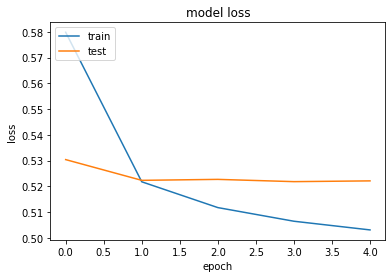

In [215]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [377]:
print(history.history["loss"][0:-2])
print(history.history["val_loss"][0:-2])

[0.5798020362854004, 0.5217675566673279, 0.5117534399032593, 0.5064589381217957, 0.5030911564826965]
[0.530377984046936, 0.5223313570022583, 0.5227046012878418, 0.5218256115913391, 0.5221213102340698]


### get desired weights 

In [216]:
def get_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = get_weights('anime_embedding', model)
user_weights = get_weights('user_embedding', model)

### building the recommendation models

do some feature engineering now

In [242]:
anime.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [246]:
anime_df = anime.replace("Unknown", np.nan)

In [248]:
import warnings
warnings.filterwarnings("ignore")

anime_df['anime_id'] = anime_df['MAL_ID']
anime_df['eng_name'] = anime_df['English name']

In [249]:
def get_anime_name(anime_id): 
    try:
        name=anime_df[anime_df.anime_id == anime_id].eng_name.values[0] 
        if name is np.nan:
            name = anime_df[anime_df.anime_id == anime_id].Name.values[0] 
    
    except Exception as e:
        print(e)
        
    return name 

In [250]:
anime_df['eng_name']=anime_df.anime_id.apply(lambda x:get_anime_name(x))

In [251]:
anime_df.sort_values(by=['Score'], inplace=True, ascending=False, kind='quicksort',na_position='last')


In [252]:
anime_df = anime_df[["anime_id", "eng_name", "Score", "Genres", "Episodes", "Type", "Premiered", "Members"]]

In [253]:
anime_df

,anime_id,eng_name,Score,Genres,Episodes,Type,Premiered,Members
3971,5114,Fullmetal Alchemist:Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen",64,TV,Spring 2009,2248456
15926,40028,Attack on Titan Final Season,9.17,"Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen",16,TV,Winter 2021,733260
5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",24,TV,Spring 2011,1771162
14963,38524,Attack on Titan Season 3 Part 2,9.1,"Action, Drama, Fantasy, Military, Mystery, Shounen, Super Power",10,TV,Spring 2019,1073626
9913,28977,Gintama Season 4,9.1,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",51,TV,Spring 2015,404121
...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,NaN,"Adventure, Mystery, Supernatural",NaN,ONA,NaN,354
17558,48483,Mieruko-chan,NaN,"Comedy, Horror, Supernatural",NaN,TV,NaN,7010
17559,48488,Higurashi:When They Cry – SOTSU,NaN,"Mystery, Dementia, Horror, Psychological, Supernatural, Thriller",NaN,TV,Summer 2021,11309
17560,48491,Yama no Susume: Next Summit,NaN,"Adventure, Slice of Life, Comedy",NaN,TV,NaN,1386


#### some useful functions

In [232]:
def get_anime_info(anime):
    if isinstance(anime ,int):
        return anime_df[anime_df.anime_id == anime]
    if isinstance(anime,str):
        return anime_df[anime_df.eng_name == anime]

In [293]:
sypnopsis_df = pd.read_csv('dataset/anime_with_synopsis.csv')
sypnopsis_df.head(2)

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized several of the planets and moons of the solar system leaving the now uninhabitable surface of planet Earth behind. The Inter Solar System Police attempts to keep peace in the galaxy, aided in part by outlaw bounty hunters, referred to as ""Cowboys."" The ragtag team aboard the spaceship Bebop are two such individuals. Mellow and carefree Spike Spiegel is balanced by his boisterous, pragmatic partner Jet Black as the pair makes a living chasing bounties and collecting rewards. Thrown off course by the addition of new members that they meet in their travels—Ein, a genetically engineered, highly intelligent Welsh Corgi; femme fatale Faye Valentine, an enigmatic trickster with memory loss; and the strange computer whiz kid Edward Wong—the crew embarks on thrilling adventures that unravel each member's dark and mysterious past little by little. Well-balanced with high density action and light-hearted comedy, Cowboy Bebop is a space Western classic and an homage to the smooth and improvised music it is named after."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of the often unlucky crew of the Bebop. However, this routine is interrupted when Faye, who is chasing a fairly worthless target on Mars, witnesses an oil tanker suddenly explode, causing mass hysteria. As casualties mount due to a strange disease spreading through the smoke from the blast, a whopping three hundred million woolong price is placed on the head of the supposed perpetrator. With lives at stake and a solution to their money problems in sight, the Bebop crew springs into action. Spike, Jet, Faye, and Edward, followed closely by Ein, split up to pursue different leads across Alba City. Through their individual investigations, they discover a cover-up scheme involving a pharmaceutical company, revealing a plot that reaches much further than the ragtag team of bounty hunters could have realized."


In [294]:
def get_anime_sypnopsis(anime):
    if isinstance(anime, int):
        return sypnopsis_df[sypnopsis_df.MAL_ID == anime].sypnopsis.values[0]
    if isinstance(anime, str):
        return sypnopsis_df[sypnopsis_df.Name == anime].sypnopsis.values[0]

In [295]:
pd.set_option("max_colwidth", None)

def similar_animes(name, n=10):
    try:
        index = get_anime_info(name).anime_id.values[0] 
        
        encoded_index = anime2anime_encoded.get(index) 
        
        weights = anime_weights 

        dists = np.dot(weights, weights[encoded_index]) 
        
        sorted_dists = np.argsort(dists) 
        
        n = n + 1            
        
        closest = sorted_dists[-n:] 
                
        print(f'The animes closest to {name} are:')

        rindex = anime_df

        SimilarityArr = [] 
        
        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            sypnopsis = get_anime_sypnopsis(decoded_id)
            anime_frame = get_anime_info(decoded_id)

            anime_name = anime_frame.eng_name.values[0]
            genre = anime_frame.Genres.values[0]
            similarity = dists[close]
            SimilarityArr.append({"anime_id": decoded_id, "name": anime_name,
                                      "similarity": similarity,"genre": genre,
                                      'synopsis': sypnopsis})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.anime_id!= index].drop(['anime_id'],axis=1)

    except:
        print(f'{name}!, Not Found in Anime list')

In [297]:
similar_animes("Fullmetal Alchemist:Brotherhood",n=3)

The animes closest to Fullmetal Alchemist:Brotherhood are:


,name,similarity,genre,synopsis
2,Code Geass:Lelouch of the Rebellion,0.853284,"Action, Military, Sci-Fi, Super Power, Drama, Mecha, School","In the year 2010, the Holy Empire of Britannia is establishing itself as a dominant military nation, starting with the conquest of Japan. Renamed to Area 11 after its swift defeat, Japan has seen significant resistance against these tyrants in an attempt to regain independence. Lelouch Lamperouge, a Britannian student, unfortunately finds himself caught in a crossfire between the Britannian and the Area 11 rebel armed forces. He is able to escape, however, thanks to the timely appearance of a mysterious girl named C.C., who bestows upon him Geass, the ""Power of Kings."" Realizing the vast potential of his newfound ""power of absolute obedience,"" Lelouch embarks upon a perilous journey as the masked vigilante known as Zero, leading a merciless onslaught against Britannia in order to get revenge once and for all."
1,Code Geass:Lelouch of the Rebellion R2,0.848786,"Action, Military, Sci-Fi, Super Power, Drama, Mecha","One year has passed since the Black Rebellion, a failed uprising against the Holy Britannian Empire led by the masked vigilante Zero, who is now missing. At a loss without their revolutionary leader, Area 11's resistance group—the Black Knights—find themselves too powerless to combat the brutality inflicted upon the Elevens by Britannia, which has increased significantly in order to crush any hope of a future revolt. Lelouch Lamperouge, having lost all memory of his double life, is living peacefully alongside his friends as a high school student at Ashford Academy. His former partner C.C., unable to accept this turn of events, takes it upon herself to remind him of his past purpose, hoping that the mastermind Zero will rise once again to finish what he started, in this thrilling conclusion to the series."
0,Steins;Gate,0.842626,"Thriller, Sci-Fi","The self-proclaimed mad scientist Rintarou Okabe rents out a room in a rickety old building in Akihabara, where he indulges himself in his hobby of inventing prospective ""future gadgets"" with fellow lab members: Mayuri Shiina, his air-headed childhood friend, and Hashida Itaru, a perverted hacker nicknamed ""Daru."" The three pass the time by tinkering with their most promising contraption yet, a machine dubbed the ""Phone Microwave,"" which performs the strange function of morphing bananas into piles of green gel. Though miraculous in itself, the phenomenon doesn't provide anything concrete in Okabe's search for a scientific breakthrough; that is, until the lab members are spurred into action by a string of mysterious happenings before stumbling upon an unexpected success—the Phone Microwave can send emails to the past, altering the flow of history. Adapted from the critically acclaimed visual novel by 5pb. and Nitroplus, Steins;Gate takes Okabe through the depths of scientific theory and practicality. Forced across the diverging threads of past and present, Okabe must shoulder the burdens that come with holding the key to the realm of time."


### similar users

In [334]:
ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user < 3000].sample(1, random_state=None).index[0]
print('random user_id:', random_user)

random user_id: 186313


In [341]:
pd.set_option("max_colwidth", None)

def get_similar_users(user, n=10):
    try:
        index = user
        encoded_index = user2user_encoded.get(index)
        weights = user_weights
    
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1
        
        closest = sorted_dists[-n:]

        print(f' users similar to #{user}')
        
        rindex = anime_df
        
        SimilarityArr = []
        
        for close in closest:
            similarity = dists[close]

            if isinstance(user, int):
                decoded_id = user_encoded2user.get(close)
                SimilarityArr.append({"similar_users": decoded_id, 
                                      "similarity": similarity})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        
        return Frame
    
    except:
        print(f'{user}!, Not Found in User list')
        

In [343]:
similar_users = get_similar_users(int(random_user), n=5)

 users similar to #186313


In [344]:
similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users

,similar_users,similarity
4,6783,0.472949
3,11572,0.457630
2,315332,0.457043
1,159409,0.456765
0,203714,0.453251


### user-item 
get user preference

In [371]:
def get_user_pref(user_id, plot=False, verbose=0 ):
    animes_watched = rating_df[rating_df.user_id == user_id] 
    user_rating_percentile = np.percentile(animes_watched.rating,75)

    animes_watched = animes_watched[animes_watched.rating >= user_rating_percentile]
   
    top_animes = animes_watched.sort_values(by=['rating'],ascending=False).anime_id.values 
    
    pref_df = anime_df[anime_df['anime_id'].isin(top_animes)]
    pref_df = pref_df[['eng_name','Genres']]
    
    if verbose!=0:
        print(f"> User #{user_id} has rated {len(animes_watched)} shows, with an average rating of {animes_watched['rating'].mean()}")
    
    return pref_df

In [372]:
user_pref= get_user_pref(random_user,verbose = 1)

> User #186313 has rated 347 shows, with an average rating of 0.8608069164265159


In [373]:
def get_recommended_animes(similar_users, n=10):
    
    recommended_animes = []
    anime_list = []
    
    for user_id in similar_users.similar_users.values:
        pref_list = get_user_pref(int(user_id), verbose=0)
        pref_list = pref_list[~ pref_list.eng_name.isin(user_pref.eng_name.values)]
        anime_list.append(pref_list.eng_name.values)
        
    anime_list = pd.DataFrame(anime_list)
    sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)
    
    for i, anime_name in enumerate(sorted_list.index):        
        n_user_pref = sorted_list[sorted_list.index == anime_name].values[0][0]
        if isinstance(anime_name, str):
            try:
                frame = get_anime_info(anime_name)
                anime_id = frame.anime_id.values[0]
                genre = frame.Genres.values[0]
                sypnopsis = get_anime_sypnopsis(int(anime_id))
                recommended_animes.append({#"anime_id": anime_id ,
                                            "n": n_user_pref,
                                            "anime_name": anime_name, 
                                            "Genres": genre, 
                                            "sypnopsis": sypnopsis})
            except:
                pass
    recommended_df=pd.DataFrame(recommended_animes) 
    return pd.DataFrame(recommended_animes)

In [380]:
rec_anime = get_recommended_animes(similar_users, n=5)
rec_anime

,n,anime_name,Genres,sypnopsis
0,7,Hunter x Hunter,"Action, Adventure, Fantasy, Shounen, Super Power","Hunter x Hunter is set in a world where Hunters exist to perform all manner of dangerous tasks like capturing criminals and bravely searching for lost treasures in uncharted territories. Twelve-year-old Gon Freecss is determined to become the best Hunter possible in hopes of finding his father, who was a Hunter himself and had long ago abandoned his young son. However, Gon soon realizes the path to achieving his goals is far more challenging than he could have ever imagined. Along the way to becoming an official Hunter, Gon befriends the lively doctor-in-training Leorio, vengeful Kurapika, and rebellious ex-assassin Killua. To attain their own goals and desires, together the four of them take the Hunter Exam, notorious for its low success rate and high probability of death. Throughout their journey, Gon and his friends embark on an adventure that puts them through many hardships and struggles. They will meet a plethora of monsters, creatures, and characters—all while learning what being a Hunter truly means."
1,6,Bakuman.,"Comedy, Drama, Romance, Shounen","Onto their third serialization, manga duo Moritaka Mashiro and Akito Takagi—also known by their pen name, Muto Ashirogi—are ever closer to their dream of an anime adaption. However, the real challenge is only just beginning: if they are unable to compete with the artist Eiji Niizuma in the rankings within the span of six months, they will be canceled. To top it off, numerous rivals are close behind and declaring war. They don't even have enough time to spare thinking about an anime! In Bakuman. 3rd Season , Muto Ashirogi must find a way to stay atop the colossal mountain known as the Shounen Jack rankings. With new problems and new assistants, the pair continue to strive for their dream."
2,5,the Garden of sinners Chapter 3:Remaining Sense of Pain,"Action, Mystery, Supernatural, Drama, Thriller","On a solemn night in July 1998, teenager Fujino Asagami is mercilessly raped by a street gang in a dilapidated bar. No matter what physical or sexual abuse they deal, however, the girl regards her captors with the same apathetic expression. The next day, mangled bodies are discovered in that same building, so torn apart that investigators find it infeasible to even consider the culprit human. Elsewhere, a client request reaches Touko Aozaki's detective agency, tasking Shiki Ryougi with either capturing or killing the perpetrator of last night's incident. But soon, word spreads that a single survivor escaped the slaughter, and now the murderer is plowing down everything in their path to locate and exterminate him. A brutal race against time begins, pitting Shiki against a dangerous foe imperceptible even to her legendary eyes."
3,5,Log Horizon,"Action, Game, Adventure, Magic, Fantasy","In the blink of an eye, thirty thousand bewildered Japanese gamers are whisked from their everyday lives into the world of the popular MMORPG, Elder Tale, after the game's latest update—unable to log out. Among them is the socially awkward college student Shiroe, whose confusion and shock lasts only a moment as, a veteran of the game, he immediately sets out to explore the limits of his new reality. Shiroe must learn to live in this new world, leading others and negotiating with the NPC ""natives"" in order to bring stability to the virtual city of Akihabara. He is joined by his unfortunate friend Naotsugu, having logged in for the first time in years only to find himself trapped, and Akatsuki, a petite but fierce assassin who labels Shiroe as her master. A tale of fantasy, adventure, and politics, Log Horizon explores the elements of gaming through the eyes of a master strategist who attempts to make the best of a puzzling situation."
4,5,Gintama:The Movie,"Action, Sci-Fi, Comedy, Historical, Parody, Samurai, Shounen","Gintoki and his Yorozuya friends (or rather, employees suffering under labor viola

#### above are the anime rec for random user #186313

now we see how accurate it is

In [379]:
actual = rating_df[rating_df.user_id == 186313]

,user_id,anime_id,rating,watching_status,watched_episodes,user,anime
57424973,186313,37281,0.7,2,9,3905,8242
57425073,186313,14833,0.6,2,12,3905,610
57424907,186313,263,0.8,2,75,3905,1270
57425281,186313,32282,1.0,2,13,3905,862
57424657,186313,36864,0.7,2,25,3905,4441
...,...,...,...,...,...,...,...
57425478,186313,5150,0.0,4,4,3905,1280
57424946,186313,42176,0.6,2,10,3905,11157
57424828,186313,27833,0.7,2,12,3905,268
57424855,186313,35222,0.8,2,12,3905,2727


In [386]:
rec_anime_name = list(rec_anime.anime_name)
rec_anime_name

['Hunter x Hunter',
 'Bakuman.',
 'the Garden of sinners Chapter 3:Remaining Sense of Pain',
 'Log Horizon',
 'Gintama:The Movie']

In [458]:
top_user_rating3 = rating_df[(rating_df.user_id == 186313)&(rating_df.rating==1)]

top_anime_name3 = []

for i in top_user_rating3.anime_id.tolist():
    name = get_anime_name(i)
    top_anime_name3.append(name)
    
np.intersect1d(rec_anime_name,top_anime_name3)  # not in the list. 

array([], dtype='<U55')

### rec based on predicted ranking 

In [401]:
def Predicted_rankings_recommender(random_user):
    print(f"Showing recommendations for user {random_user}")

    animes_watched_by_user = rating_df[rating_df.user_id == random_user]
    anime_not_watched_df = anime_df[~anime_df["anime_id"].isin(animes_watched_by_user.anime_id.values)]

    anime_not_watched = list(set(anime_not_watched_df['anime_id']).intersection(set(anime2anime_encoded.keys()))
    )
    anime_not_watched = [[anime2anime_encoded.get(x)] for x in anime_not_watched]

    user_encoder = user2user_encoded.get(random_user) #returns the encoded index

    user_anime_array = np.hstack(
        ([[user_encoder]] * len(anime_not_watched), anime_not_watched))

    user_anime_array = [user_anime_array[:, 0], user_anime_array[:, 1]] 

    pred_ratings = model.predict(user_anime_array).flatten() 
    
    top_ratings_indices = (-pred_ratings).argsort()[:10] 

    recommended_anime_ids = [anime_encoded2anime.get(anime_not_watched[x][0]) for x in top_ratings_indices]

    Results = []
    top_rated_ids = []

    for index, anime_id in enumerate(anime_not_watched):
        rating = pred_ratings[index] 
        id_ = anime_encoded2anime.get(anime_id[0]) 
        if id_ in recommended_anime_ids:
            try:
                top_rated_ids.append(id_)
                condition = (anime_df.anime_id == id_)  
                name = anime_df[condition]['eng_name'].values[0]
                genre = anime_df[condition].Genres.values[0]
                synopsis = get_anime_sypnopsis(int(id_))        
            except:
                continue
                
            Results.append({"name": name, 
                            "predicted_rating": rating,
                            "genre": genre, 
                            'sypnopsis': synopsis})

    print(" Top 10 anime recommendations for you are: ")
    Top10_df = pd.DataFrame(Results).sort_values(by='predicted_rating', ascending=False)
    
    return Top10_df

In [402]:
Predicted_rankings_recommender(random_user)

Showing recommendations for user 186313
509/509 [==============================] - 1s 941us/step
 Top 10 anime recommendations for you are: 


,name,predicted_rating,genre,sypnopsis
1,Detective Conan: Episode One - The Great Detective Turned Small,0.928550,"Adventure, Mystery, Comedy, Police, Shounen","The ""real"" episode 1 of Detective Conan written by the Mangaka Gosho Aoyama."
9,Gintama°: Umai-mono wa Atomawashi ni Suru to Yokodorisareru kara Yappari Saki ni Kue,0.902185,"Action, Comedy, Historical, Parody, Samurai, Shounen","The Gintama crew gets together to present a preview for the upcoming arc, the biggest ever in the anime's history, and also discuss the difficulties involved in producing one mid-season. (Source: Crunchyroll)"
3,Ginga Eiyuu Densetsu: Die Neue These - Seiran 1,0.897722,"Action, Drama, Military, Sci-Fi, Space","The Free Planets Alliance's invasion of the Galactic Empire has failed after supply mismanagement led to heavy losses. Unwilling to abort the expedition despite being greatly outnumbered, Fleet Admiral Lazar Lobos orders the remaining Alliance fleets to gather in the Amritsar Starzone for a final stand against the incoming counterattack. Strategic genius Fleet Admiral Reinhard von Lohengramm leads the Imperial forces into this decisive battle with an overwhelming advantage. However, his rival, tactical magician Vice Admiral Yang Wen-li of the Alliance, once again makes up for the incompetence of his superiors and stages a narrow escape for himself and his fellow soldiers. Though both Reinhard and Yang are displeased with the outcome—the former for his imperfect victory and the latter for the tremendous casualties—their attention must turn to the bubbling political unrest on both sides of the galaxy."
5,The Perfect World,0.889242,Music,"Official music video for B: The Beginning 's ending theme song The Perfect World . Performed by Marty Friedman feat. Jean-Ken Johnny, KenKen. The music video was released on the music producer Avex's official YouTube channel and it promotes the anime's image album soundtrack going on sale March 7, 2018--only 5 days after the anime is released."
6,Vevara in Your Dream,0.887728,"Magic, Fantasy",Sana suddenly awakes and is transported to a dream world by someone or something? What she experiences will change her life in the real world forever (Source: Official Website)
8,Steins;Gate:The Movie − Load Region of Déjà Vu,0.887041,"Sci-Fi, Drama","fter a year in America, Kurisu Makise returns to Akihabara and reunites with Rintarou Okabe. However, their reunion is cut short when Okabe begins to experience recurring flashes of other timelines as the consequences of his time traveling start to manifest. These side effects eventually culminate in Okabe suddenly vanishing from the world, and only the startled Kurisu has any memory of his existence. In the midst of despair, Kurisu is faced with a truly arduous choice that will test both her duty as a scientist and her loyalty as a friend: follow Okabe's advice and stay away from traveling through time to avoid the potential consequences it may have on the world lines, or ignore it to rescue the person that she cherishes most. Regardless of her decision, the path she chooses is one that will affect the past, the present, and the future."
7,Gintama: The Semi-Final,0.880200,"Action, Comedy, Historical, Parody, Samurai, Shounen",New special that will tie into the third new Gintama anime film. (Source: ANN)
2,Detective Conan Movie 21: The Crimson Love Letter,0.879141,"Action, Mystery, Historical, Police, Drama, Romance","ombing case at Nichiuri TV in autumn. The Satsuki Cup, which crowns the winner of Japan's Hyakunin Isshu, is currently being filmed inside the facility. The incident results in a big commotion and, while the building is burning to ashes, the only people left inside are Heiji and Kazuha. They get rescued just in time by Conan, who rushes to the scene. Both the identity and purposes of the bomber are unknown. While confusion takes over due to the explosion, Conan meets a mysterious beautiful girl who claims she is ""Heiji's fiancée"". Her name is Momiji Ooka

In [404]:
rating_df[rating_df.user_id == 186313][rating]

,user_id,anime_id,rating,watching_status,watched_episodes,user,anime
57424973,186313,37281,0.7,2,9,3905,8242
57425073,186313,14833,0.6,2,12,3905,610
57424907,186313,263,0.8,2,75,3905,1270
57425281,186313,32282,1.0,2,13,3905,862
57424657,186313,36864,0.7,2,25,3905,4441
...,...,...,...,...,...,...,...
57425478,186313,5150,0.0,4,4,3905,1280
57424946,186313,42176,0.6,2,10,3905,11157
57424828,186313,27833,0.7,2,12,3905,268
57424855,186313,35222,0.8,2,12,3905,2727


#### predicted rankings on animes watched by users (top-10 in results)

In [412]:
def Predicted_rankings(random_user):
    print(f"Showing recommendations for user {random_user}")

    animes_watched_by_user = rating_df[rating_df.user_id == random_user]
    #anime_not_watched_df = anime_df[~anime_df["anime_id"].isin(animes_watched_by_user.anime_id.values)]

    #animes_watched_by_user = list(set(animes_watched_by_user['anime_id']).intersection(set(anime2anime_encoded.keys())))
    
    
    anime_watched = list(set(animes_watched_by_user['anime_id']).intersection(set(anime2anime_encoded.keys())))
    
    anime_watched = [[anime2anime_encoded.get(x)] for x in anime_watched]

    user_encoder = user2user_encoded.get(random_user) 

    user_anime_array = np.hstack(
        ([[user_encoder]] * len(anime_watched), anime_watched))

    user_anime_array = [user_anime_array[:, 0], user_anime_array[:, 1]] 

    pred_ratings = model.predict(user_anime_array).flatten() 
    
    top_ratings_indices = (-pred_ratings).argsort()[:10] 

    recommended_anime_ids = [anime_encoded2anime.get(anime_watched[x][0]) for x in top_ratings_indices]

    Results = []
    top_rated_ids = []

    for index, anime_id in enumerate(anime_watched):
        rating = pred_ratings[index] 
        id_ = anime_encoded2anime.get(anime_id[0]) 
        if id_ in recommended_anime_ids:
            try:
                top_rated_ids.append(id_)
                condition = (anime_df.anime_id == id_)  
                name = anime_df[condition]['eng_name'].values[0]
                genre = anime_df[condition].Genres.values[0]
                synopsis = get_anime_sypnopsis(int(id_))        
            except:
                continue
                
            Results.append({"name": name, 
                            "predicted_rating": rating,
                            "genre": genre, 
                            'sypnopsis': synopsis})

    print("predicted rating top10 anime: ")
    Top10_df = pd.DataFrame(Results).sort_values(by='predicted_rating', ascending=False)
    
    return Top10_df

In [425]:
pred_ranking = Predicted_rankings(random_user)
pred_ranking

Showing recommendations for user 186313
32/32 [==============================] - 0s 1ms/step
predicted rating top10 anime: 


,name,predicted_rating,genre,sypnopsis
2,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare,0.941001,"Action, Sci-Fi, Comedy, Historical, Parody, Samurai, Shounen","hen Gintoki apprehends a movie pirate at a premiere, he checks the camera's footage and finds himself transported to a bleak, post-apocalyptic version of Edo, where a mysterious epidemic called the ""White Plague"" has ravished the world's population. It turns out that the movie pirate wasn't a pirate after all—it was an android time machine, and Gintoki has been hurtled five years into the future! Shinpachi and Kagura, his Yorozuya cohorts, have had a falling out and are now battle-hardened solo vigilantes and he himself has been missing for years, disappearing without a trace after scribbling a strange message in his journal. Setting out in the disguise given to him by the android time machine, Gintoki haphazardly reunites the Yorozuya team to investigate the White Plague, and soon discovers that the key to saving the future lies in the darkness of his own past. Determined to confront a powerful foe, he makes an important discovery—with a ragtag band of friends and allies at his side, he doesn't have to fight alone."
3,Kizumonogatari Part 2:Nekketsu,0.930544,"Action, Mystery, Supernatural, Vampire","No longer truly human, Koyomi Araragi decides to retrieve Kiss-shot Acerola-orion Heart-under-blade's severed body parts that were stolen by three powerful vampire hunters. Awaiting him are Dramaturgie, a vampire hunter who is a vampire himself; Episode, a half-vampire with the ability to transform into mist; and Guillotinecutter, a human priest who is the most dangerous of them all. Unbeknownst to Araragi, each minute he spends trying to retrieve Kiss-shot's limbs makes him less of a human and more of a vampire. Will he be able to keep his wish of becoming human once again by the end of his battles?"
4,Kizumonogatari III: Reiketsu-hen,0.922339,"Action, Mystery, Supernatural, Vampire","fter helping revive the legendary vampire Kiss-shot Acerola-orion Heart-under-blade, Koyomi Araragi has become a vampire himself and her servant. Kiss-shot is certain she can turn him back into a human, but only once regaining her full power. Araragi has hunted down the three vampire hunters that defeated Kiss-shot and retrieved her limbs to return her to full strength. However, now that Araragi has almost accomplished what he’s been fighting for this whole time, he has to consider if this is what he really wants. Once he revives this powerful immortal vampire, there is no telling what she might do, and there would be no way of stopping her. But there is more to the story that Araragi doesn’t understand. If a newborn vampire like him could defeat the hunters, how did they overpower Kiss-shot? Can he trust her to turn him back to a human? And how is that even possible in the first place? Araragi is at his limit but he must come to a decision, and it may not be possible to resolve this situation without doing something he’ll regret…"
5,Kizumonogatari Part 1:Tekketsu,0.922048,Vampire,"During Koyomi Araragi's second year at Naoetsu Private High School, he has a chance encounter with Tsubasa Hanekawa, the top honor student in his class. When they strike up a conversation, Hanekawa mentions a shocking rumor: a vampire with beautiful blonde hair and freezing cold eyes has been seen lurking around town. Happy to have made a new friend, Araragi writes off the rumor and goes about the rest of his evening in a carefree manner. However, on his way home, he stumbles across splatters of blood leading down the stairs to the subway. His curiosity pushes him to investigate further, so he follows the gruesome pools into the depths of the station. When he arrives at the source of the blood, he is terrified by what he sees—the rumored blonde vampire herself, completely dismembered. After she calls for his help, Araragi must make a decision, one which carries the potential to change his life forever."
6,

In [419]:
top_10_user_rating = rating_df[rating_df.user_id == random_user].sort_values('rating', ascending=False).head(10)
top_10_user_rating  # user have rated many animes to max scale.

,user_id,anime_id,rating,watching_status,watched_episodes,user,anime
57424978,186313,37999,1.0,2,12,3905,1674
57424902,186313,32935,1.0,2,10,3905,389
57424877,186313,268,1.0,2,6,3905,1255
57424922,186313,777,1.0,2,10,3905,410
57425053,186313,851,1.0,2,10,3905,1383
57424882,186313,37105,1.0,2,12,3905,1810
57424771,186313,11843,1.0,2,12,3905,209
57425229,186313,34612,1.0,2,24,3905,792
57424865,186313,15417,1.0,2,13,3905,336
57424904,186313,40776,1.0,2,12,3905,1817


In [420]:
top_user_rating = rating_df[(rating_df.user_id == random_user)&(rating_df.rating==1)]
top_user_rating  

,user_id,anime_id,rating,watching_status,watched_episodes,user,anime
57425281,186313,32282,1.0,2,13,3905,862
57424871,186313,28977,1.0,2,51,3905,344
57424771,186313,11843,1.0,2,12,3905,209
57425197,186313,31181,1.0,2,12,3905,1481
57425198,186313,35247,1.0,2,7,3905,1482
57425288,186313,28735,1.0,2,13,3905,868
57424860,186313,23289,1.0,2,12,3905,329
57425018,186313,36098,1.0,2,1,3905,521
57425164,186313,30276,1.0,2,12,3905,690
57424983,186313,8525,1.0,2,12,3905,494


In [423]:
top_anime_name = []
for i in top_user_rating.anime_id.tolist():
    name = get_anime_name(i)
    top_anime_name.append(name)

In [424]:
top_anime_name

['Food Wars! The Second Plate',
 'Gintama Season 4',
 'Daily Lives of High School Boys',
 'Owarimonogatari',
 'Owarimonogatari Second Season',
 'Showa Genroku Rakugo Shinju',
 "Monthly Girls' Nozaki-kun",
 'I want to eat your pancreas',
 'One Punch Man',
 'The World God Only Knows',
 'Demon Slayer:Kimetsu no Yaiba',
 'The Eccentric Family',
 'Grand Blue Dreaming',
 'My Teen Romantic Comedy SNAFU Climax!',
 'Prison School',
 'Wolf Children',
 'Kaguya-sama:Love is War',
 'Here is Greenwood',
 'Haikyuu!!: To the Top 2nd Season',
 'Monster',
 "Natsume's Book of Friends Season 6",
 'Your Name.',
 'The Garden of Words',
 'As Miss Beelzebub Likes.',
 "Natsume's Book of Friends Season 4",
 'Kyou kara Ore wa!!',
 'Hellsing Ultimate',
 'Food Wars! Shokugeki no Soma',
 'Code Geass:Lelouch of the Rebellion R2',
 'Haikyu!! 3rd Season',
 'Great Teacher Onizuka',
 'Gintama',
 'Death Note',
 "KonoSuba:God's Blessing on This Wonderful World! 2",
 'Barakamon',
 'The Disastrous Life of Saiki K. 2',
 'The

In [426]:
np.intersect1d(list(pred_ranking.name),top_anime_name)  # 2/10 in the actual top_ranked list. 

array(['Gintama:Enchousen', 'The Disastrous Life of Saiki K. 2'],
      dtype='<U80')

### predict another 

In [451]:
rec = Predicted_rankings_recommender(16532)
rec_list = rec.name.tolist()
rec_list

Showing recommendations for user 16532
509/509 [==============================] - 0s 918us/step
 Top 10 anime recommendations for you are: 


['Hunter x Hunter: Greed Island',
 'Hunter x Hunter: Greed Island Final',
 'Hunter x Hunter: Original Video Animation',
 'Jing-Ju Cats 3',
 'Hunter x Hunter',
 'Samurai X:Reflection',
 'Lupin III:The Castle of Cagliostro',
 'Hellsing Ultimate',
 'The Wind Rises',
 'Porco Rosso']

In [460]:
top_user_rating2 = rating_df[(rating_df.user_id == 16532)&(rating_df.rating==1)]

top_anime_name2 = []

for i in top_user_rating2.anime_id.tolist():
    name = get_anime_name(i)
    top_anime_name2.append(name)
    
np.intersect1d(rec_list,top_anime_name)  # 1/10 in the actual top_ranked list. pretty good! 

array(['Hellsing Ultimate'], dtype='<U50')

In [ ]:
top_user_rating2 = rating_df[(rating_df.user_id == 16532)&(rating_df.anime_id==1)]

In [455]:
model.save('anime_model.h5')